In [1]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [2]:
config_file = '../configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-c57ef100.pth'

In [3]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

In [4]:
# test a single image
img = 'demo.png'
result = inference_segmentor(model, img)

/home/SENSETIME/xujiarui/code/mmsegmentation/mmseg/ops/wrappers.py:27: UserWarning: When align_corners=True, the output would more aligned if input size (1, 1) and out size (90, 90) is `2x+1`
  (out_h, out_w)))
/home/SENSETIME/xujiarui/code/mmsegmentation/mmseg/ops/wrappers.py:27: UserWarning: When align_corners=True, the output would more aligned if input size (2, 2) and out size (90, 90) is `2x+1`
  (out_h, out_w)))
/home/SENSETIME/xujiarui/code/mmsegmentation/mmseg/ops/wrappers.py:27: UserWarning: When align_corners=True, the output would more aligned if input size (3, 3) and out size (90, 90) is `2x+1`
  (out_h, out_w)))
/home/SENSETIME/xujiarui/code/mmsegmentation/mmseg/ops/wrappers.py:27: UserWarning: When align_corners=True, the output would more aligned if input size (6, 6) and out size (90, 90) is `2x+1`
  (out_h, out_w)))
/home/SENSETIME/xujiarui/code/mmsegmentation/mmseg/ops/wrappers.py:27: UserWarning: When align_corners=True, the output would more aligned if input size (90

/home/SENSETIME/xujiarui/code/mmsegmentation/mmseg/models/segmentors/base.py:144: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


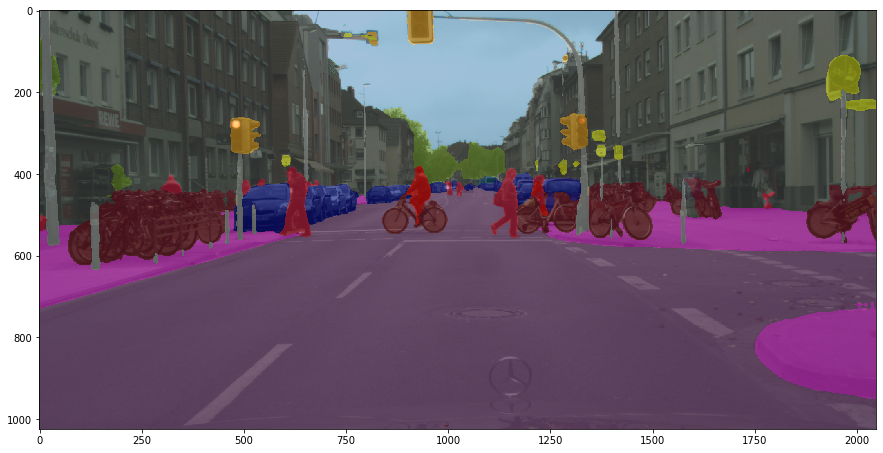

In [5]:
# show the results
show_result_pyplot(model, img, result, get_palette('cityscapes'))